# Исследование активности пользователей приложения аренды самокатов:

В нашем распоряжении данные приложения GoFast — информация о пользователях, их поездках и подписках. Нашей конечной целью является поиск точек роста бизнеса аренды самокатов: выявление полезных закономерностей и паттернов в данных для увелечения прибыли компании.

**Полезные цели исследования(для заказчика):**

1)Подсчёт выручки.

2)Проверка гипотез.

3)Исследовательские задачи.

**Ход исследования:**


Для начала работы получим данные из CSV-файлов(их в нашем случае 3). Неизвестно в этих датефреймах качество данных, поэтому необходимо перед началом анализа провести необходимый обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки по возможности исправлю данные ошибки, не исказив конечный результат исследования. Создадим новые столбцы для внесения конкретики, затем приступим к исследованию. После соединим таблицы(заджоиним их) и приступим к статистическому анализу: посчитаем выручку, проверим гипотезы, проанализируем распределения. Сделаем общий вывод: найдём точки роста для бизнеса/заказчика(ценовые/неценовые).

Таким образом, моё исследование пройдёт в 9 этапов:

- Обзор данных.

- Подготовка данных/Предобработка данных.

- Исследовательский анализ данных.

- Объединение данных. 

- Подсчёт выручки.

- Проверка гипотез.

- Выявление полезных паттернов из распределений(опционально)

- выполнение контрольной точки №1.

- Подведение итогов работы: общий вывод.

# Документация:

![image.png](Документация_пользователи.jpg)

![image.png](Документация_поездки.jpg)

![image.png](Документация_подписки.jpg)

# Цветовое оформление:

<td style="background-color: skyblue;">- Интерпритация действий, графиков, методов, а также комментарии и т.д.</td>

<td style="background-color: pink;">- Требуемые задания от заказчика(наши задачи которые нужно решить/в рамках курса - задачи от Яндекса ).</td>

<td style="background-color: lightgreen;">Рекомендации заказчику(фигурирует только в общем итоге).</td>

#### Шаг 1. Загрузка данных

<td style="background-color: pink;">1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы</td>

<td style="background-color: skyblue;">Импортируем необходимые библиотеки</td>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import numpy as np

<td style="background-color: skyblue;">Записываем в переменные наши датафреймы</td>

In [2]:
try:
    df_users = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep='\t')

In [3]:
try:
    df_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
except:
    df_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep='\t')

In [4]:
try:
    df_subs = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    df_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep='\t')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

<td style="background-color: pink;">1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.</td>

<td style="background-color: skyblue;">Выводим первые 20 строчек датафреймов на экран для проверки правильности чтения файлов и частичного ознакомления:</td>

In [5]:
df_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
df_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
df_subs.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<td style="background-color: skyblue;">Выводим основную информацию о датафреймах с помощью метода info():</td>


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


<td style="background-color: skyblue;">В таблице с информацией о пользователях у нас всего 1565 записей, пропуски отсутсвуют, названия атрибутов соблюдают требования единого стиля(1. все на английском языке; 2.названия адекватно отражают сущность записей; 3. snake-case). Приемлемый тип данных подобран для каждого столбца(атрибута).</td>

In [9]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<td style="background-color: skyblue;">В таблице с информацией о поездках у нас всего 18068 записей, пропуски отсутсвуют, названия атрибутов соблюдают требования единого стиля(1. все на английском языке; 2.названия адекватно отражают сущность записей; 3. snake-case). Приемлемый тип данных подобран для каждого столбца(атрибута).</td>

In [10]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<td style="background-color: skyblue;">В таблице с информацией о типах подписок у нас всего 2 записи, пропуски отсутсвуют, названия атрибутов соблюдают требования единого стиля(1. все на английском языке; 2.названия адекватно отражают сущность записей; 3. snake-case). Приемлемый тип данных подобран для каждого столбца(атрибута).</td>

<td style="background-color: skyblue;">Таблицы с данными о пользователях и поездках имеют количественные(численные) переменные, выведем первичные описательные статистики:</td>

In [11]:
df_users.describe().T
# метод '.T' - транспортирует(меняет местамит наименования столбцов и базовых статистик)
# полезный метод условии наличия большого количества атрибутов в таблице

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


<td style="background-color: skyblue;">В таблице с данными пользователей 1565 записей, но в атрибуте максимальным порядковым значением(уникальным идентификатором клиента) является значение 1534, что говорит о наличии дубликатов. Возраст клиентов приемлемый(аномалий на этапе ознакомление не видно).</td>

In [12]:
df_rides.describe().style.background_gradient(
    subset=["distance"], cmap="Reds")

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


<td style="background-color: skyblue;">В таблице с данными о поездках явных аномалий на этапе ознакомления не видно. Если взять максимальное/минимальное расстояние и разделить на время, то скорость будет вполне адекватной для самоката(это навскидку, далее мы создадим столбец со скоростью и убедимся в этом). Думаю стоит убрать уж очень короткие заезды т. к. врятле это полноценная поездка какого-то пользователя. Это может быть проверкой технического состояния самоката или это самокат который получил неисправность во время использования и выключился и тд.</td>

<td style="background-color: skyblue;">Построю гистограммы для атрибутов датафреймов(о пользователях и о поездках) с целью первичного ознакомления(позже раскроим их более подробно при необходимости):</td>

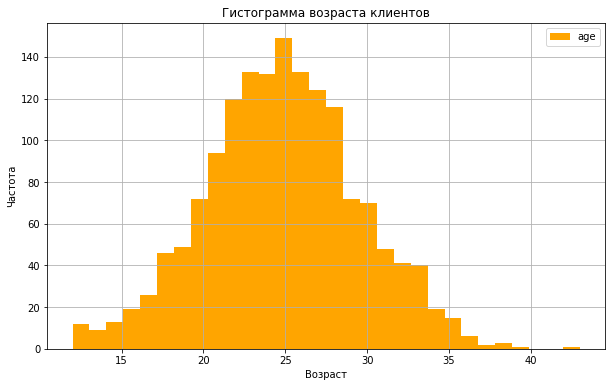

In [13]:
df_users['age'].hist(figsize=(10, 6), color='orange', legend=True, grid=True, bins=30)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма возраста клиентов')
plt.show()

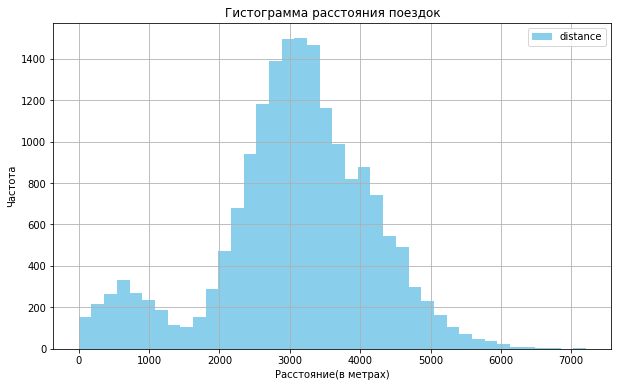

In [14]:
df_rides['distance'].hist(figsize=(10, 6), color='#89CEEB', legend=True, grid=True, bins=40)
plt.xlabel('Расстояние(в метрах)')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния поездок')
plt.show()

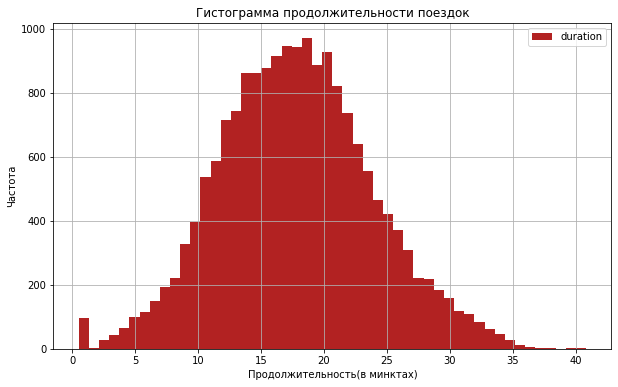

In [15]:
df_rides['duration'].hist(figsize=(10, 6), color='#B22222', legend=True, grid=True, bins=50)
plt.xlabel('Продолжительность(в минктах)')
plt.ylabel('Частота')
plt.title('Гистограмма продолжительности поездок')
plt.show()

<td style="background-color: skyblue;">Получились вполне адекватные распределения(Пуассоновские). Из странного:</td>

- На гистограмме с расстоянием('distance') присутствуют 2 вершины: маленькая и большая(относительно друг друга), природу которых следует узнать на этапе предобработки данных.

- На гистограмме со времнем('duration') есть слишком большое количество заездов где время около минуты что отражено на гистограмме. 

*После первичного ознакомление с датасетами однозначно можно сказать, что набор данных вполне неплохой: вовсе отсутствуют пропущенные значения, распределения числовых атрибутов вполне адекватные(одно распределение мы разберём для выявление природы двойной вершины), единая стилистика названий столбцов соблюдена. Объём для предобработки не особо велик: нужно поработать с дубликатами(явными/неявными), узнать природу двойной вершины в одном из распределений и добавить конкретизующие столбцы(опционально), посмотреть зависимости столбцов(возможно будет найти не очень очевидные аномалии).*

#### Шаг 2. Предобработка данных

<td style="background-color: skyblue;">Для начала зафиксируем количество записей в каждой таблице, чтобы установить процент потерянных данных после предобработки.</td>

In [16]:
df_users_start, df_rides_start, df_subs_start = len(df_users), len(df_rides), len(df_subs)

<td style="background-color: pink;">2.1 Изменим тип данных в столбце 'date' в датафрейме о поездках:</td>

In [17]:
df_rides['date'] = df_rides['date'].astype('datetime64[M]')

<td style="background-color: pink;">2.2 Создайте новый столбец с номером месяца на основе столбца date:</td>

<td style="background-color: skyblue;">Узнаем за какой период у  нас данные - выведем размах дат поездок:</td>

In [18]:
# Прописываю print чтобы не было кавычек
print(f" Данные в df_rides имеют диапозон дат: от {df_rides['date'].min()} до {df_rides['date'].max()}")

 Данные в df_rides имеют диапозон дат: от 2021-01-01 00:00:00 до 2021-12-01 00:00:00


<td style="background-color: skyblue;">Данные в наборе данных имеют диапозон за один год, а значит при использовании метода dt.month объединения в одну группу месяцев за разные года, имеющие ту же нумерацию не произойдёт. Всё будет работать и подсчитываться корректно.</td>

In [19]:
df_rides['month'] = df_rides['date'].dt.month

<td style="background-color: pink;">2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.</td>

In [20]:
df_users.duplicated().sum()

31

<td style="background-color: skyblue;">Найден 31 дубликат в датафрейме df_users</td>

In [21]:
df_rides.duplicated().sum()

0

<td style="background-color: skyblue;">Найдено 0 дубликатов в датафрейме df_rides</td>

<td style="background-color: skyblue;">В датафрейме  df_subs дубликатов нет т.к. там 2 отличающиеся друг от друга записи.</td>

<td style="background-color: skyblue;">Удалим явные дубликаты в датафреймах(в таблице с типами подписки их однозначно нет т.к. в нём 2 записи):</td>

In [22]:
df_users = df_users.drop_duplicates()

In [23]:
df_rides = df_rides.drop_duplicates()

<td style="background-color: skyblue;">Вот теперь у нас 1534 записи в таблице с данными о клиентах, что соответствует максимальному значению идентификатора клиента. Проблема которую мы выявили в ознакомительном этапе устанена.</td>

<td style="background-color: skyblue;">Проверим наличие неявных дубликатов в таблицах:</td>

<td style="background-color: skyblue;">Напишем функцию которая принимает в качетсве аргумента датафрейм и выводит все уникальные значения в каждом атрибуте:</td>

In [24]:
def all_unique(df):
    unique_attr = df.columns.to_list()
    for attribute in unique_attr:
        unique_values = df[attribute].unique()
        print(f'Атрибут {attribute} хранит следующие уникальные значения: {unique_values}')
        print()
        print()

In [25]:
all_unique(df_users)

Атрибут user_id хранит следующие уникальные значения: [   1    2    3 ... 1532 1533 1534]


Атрибут name хранит следующие уникальные значения: ['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Ди

In [26]:
all_unique(df_rides)

Атрибут user_id хранит следующие уникальные значения: [   1    2    3 ... 1532 1533 1534]


Атрибут distance хранит следующие уникальные значения: [4409.9191402  2617.59215346  754.15980696 ... 3826.1855073  2902.30866066
 2371.71119224]


Атрибут duration хранит следующие уникальные значения: [25.59976897 15.81687145  6.23211346 ... 18.43505138 16.6743622
 15.89391697]


Атрибут date хранит следующие уникальные значения: ['2021-01-01T00:00:00.000000000' '2021-04-01T00:00:00.000000000'
 '2021-08-01T00:00:00.000000000' '2021-10-01T00:00:00.000000000'
 '2021-11-01T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-03-01T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-07-01T00:00:00.000000000' '2021-02-01T00:00:00.000000000'
 '2021-05-01T00:00:00.000000000' '2021-09-01T00:00:00.000000000']


Атрибут month хранит следующие уникальные значения: [ 1  4  8 10 11 12  3  6  7  2  5  9]




<td style="background-color: skyblue;">Неявных дубликатов не обнаружено.</td>

<td style="background-color: skyblue;">Построим ящик с усами для столбца с дистанцией пользователей:</td>

Text(0.5, 1.0, 'Ящик с усами для столбца с расстоянием поездок')

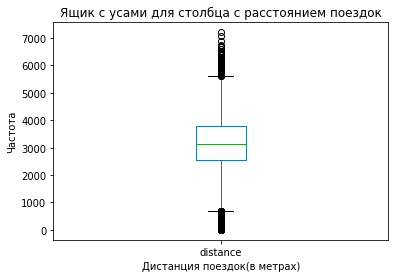

In [27]:
df_rides['distance'].plot(kind='box')
plt.xlabel('Дистанция поездок(в метрах)')
plt.ylabel('Частота')
plt.title('Ящик с усами для столбца с расстоянием поездок')

<td style="background-color: skyblue;">Самокат вполне может проехать больше 7500 м, поэтому расстояния которые согласно ящика с усами считаются выбросами сверху мы убирать не будем. А вот аномалии снизу ящика мы могли бы немного почистить: убрать значения где расстояние меньше 200м: мы так могли бы сделать т.к. это не противоречит ящику и нельзя сказать что кто-то будет намеренно проезжать так мало: скорее это ошибка или момент разрядки самоката и другое, но если мы удалим такие значения, то мы потеряем очень важные цифры для подсчёта выручки. Так что мы поступим следующим образом: удалять данные мы не можем, но мы для себя выделим возможное наличие аномалии, поэтому в дальшейшем при работе с этим атрибутом будем иметь это в виду при последующих действиях.td>

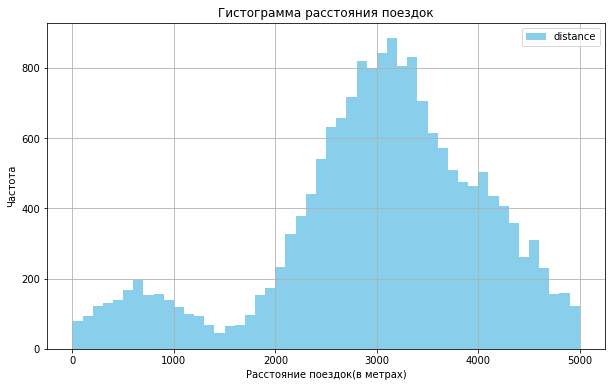

In [28]:
df_rides['distance'].hist(figsize=(10, 6), color='#89CEEB', legend=True, grid=True, bins=50, range=(0, 5000))
plt.xlabel('Расстояние поездок(в метрах)')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния поездок')
plt.show()

<td style="background-color: skyblue;">Найдём временной диапозон за который собрали данные:</td>

In [29]:
f'Промежуток времени за которые были собраны данные: {df_rides["date"].min()} - {df_rides["date"].max()}'

'Промежуток времени за которые были собраны данные: 2021-01-01 00:00:00 - 2021-12-01 00:00:00'

<td style="background-color: skyblue;">У нас имеется 2 вершины и при этом одна гораздо меньше другой. О чём эта особенность может нам сказать? Скорее всего ошибки в единицах записи расстояния нет, т. к. 1)данных немного(+ они собраны за короткий промежуток времени - один год, также общая картина объёма работы предобработки говорит нам о том что набор данных относительно чистый), отсюда следует мысль о маловероятности ошибки(но она в любом случае возможна). Как мы поступим(ошибка возможна, но маловероятна)? Поступим согласно такому алгоритму:</td>

![image.png](АРСДП.jpg)

<td style="background-color: skyblue;">Добавим конкретизующий столбец: средняя скорость за сеанс(км/ч):</td>

In [30]:
df_rides['avg_speed_km_h'] = (df_rides['distance'] / 1000) / (df_rides['duration'] / 60)

<td style="background-color: skyblue;">Теперь найдём медианное значение скорости для каждого промежутка(которые составляют вершины):</td>

In [31]:
med_speed_left_1500 = df_rides.query('distance < 1500')['avg_speed_km_h'].median()
print(med_speed_left_1500)

4.180626948962365


In [32]:
med_speed_right_1500 = df_rides.query('distance > 1500')['avg_speed_km_h'].median()
print(med_speed_right_1500)

10.660228073939763


In [33]:
print(f'{(med_speed_right_1500 / med_speed_left_1500 * 100).round(2)}%')
# без 'print' выводятся кавычки 

254.99%


<td style="background-color: skyblue;">Медианная скорость пользователей которые составляют большую вершину на 238% больше, а значит многовероятно что меньшую вершину образуют новички. Исходя из этого как-то видоизменять набор данных мы не будем(ошибки в единицах измерения записи данных не было).</td>

<td style="background-color: skyblue;">Интересно посмотреть описательные статистики для нового столбца:</td>

In [34]:
df_rides['avg_speed_km_h'].describe()

count    18068.000000
mean        13.785261
std         44.156189
min          0.005133
25%          8.127843
50%         10.251135
75%         12.929800
max        865.320929
Name: avg_speed_km_h, dtype: float64

<td style="background-color: skyblue;">Вот тут мы уже видим, что набор данных не такой уж и чистый т.к. максимальная скорость доходит до 865 км/ч. Построим 'boxplot'(ящик с усами) и поглядим на выбросы:</td>

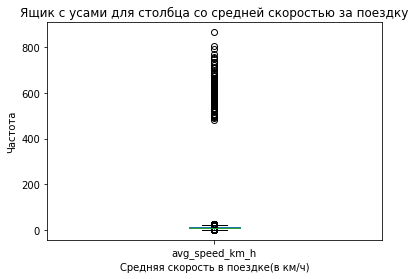

In [35]:
df_rides['avg_speed_km_h'].plot(kind='box')
plt.xlabel('Средняя скорость в поездке(в км/ч)')
plt.ylabel('Частота')
plt.title('Ящик с усами для столбца со средней скоростью за поездку')
plt.show()

<td style="background-color: skyblue;">За выбросы мы посчитаем заезды где скорость больше 25 км/ч: В ПДД прописаны ограничения для скорости и веса самокатов. Скорость — не более 25 км/ч для всех СИМ. Т.к. у нас атрибут средней скорости и мы знаем что компания блокирует скорость выше 25, то можно логически оценить, что достичь среднюю скорость заезда в 25 км/ч практически невозможно. Почему практически? В теории возможно что самокат не способен предоставлять надёжную блокировку скорости при спуска с горки(значит его можно разогнать в таком случае, но врятле компания этого не учла) и также не стоит забывать что клиент стартует и заканчивает поездку не с максимально возможной скорости(с нуля), поэтому если даже стараться выжжать максимум на самокате, то скорость будет лишь стремиться к 25км/ч. Не будем удалять выбросы снизу ящика, хотя они соответствуют статусу выбросов согласно концепции ящика с усами. Почему? Возможно в самокате возможно настроить невысокую скорость(данных о функционале самоката мы не имеем и в открытых ресурсах их нет) или пользователь ехал не так быстро и часто останавливался. Среднюю скорость за поездку где значение превышает 25 км/ч мы заменим на медианное значение.</td>

In [36]:
df_rides.loc[df_rides['avg_speed_km_h'] > 25, 'avg_speed_km_h'] = df_rides['avg_speed_km_h'].median()

In [37]:
df_rides['avg_speed_km_h'].describe()

count    18068.000000
mean        10.609698
std          3.948946
min          0.005133
25%          8.127843
50%         10.251093
75%         12.850319
max         24.905329
Name: avg_speed_km_h, dtype: float64

<td style="background-color: skyblue;">И от аномалий избавились, и записи в датафрейме сохранили.</td>


<td style="background-color: skyblue;">Посмотрим на заезды которые длились меньше минуты:</td>

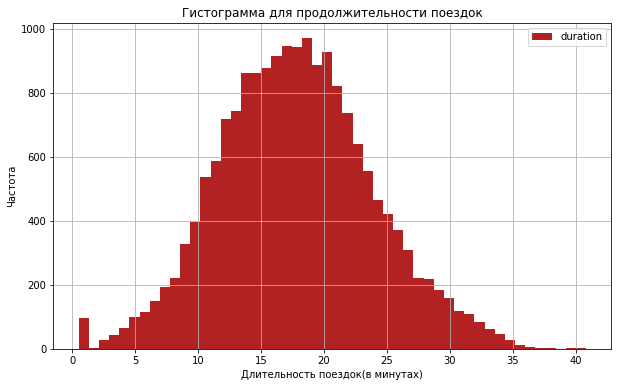

In [38]:
df_rides['duration'].hist(figsize=(10, 6), color='#B22222', legend=True, grid=True, bins=50)
plt.xlabel('Длительность поездок(в минутах)')
plt.ylabel('Частота')
plt.title('Гистограмма для продолжительности поездок')
plt.show()


<td style="background-color: skyblue;">Посмотрим на записи где продолжительность меньше минуты, т.к. будто их слишком много:</td>

In [39]:
df_rides.query('duration < 1')

,user_id,distance,duration,date,month,avg_speed_km_h
6531,701,4196.445201,0.5,2021-08-01,8,10.251135
6570,704,4830.824371,0.5,2021-10-01,10,10.251135
6680,712,4684.004397,0.5,2021-03-01,3,10.251135
6695,713,5215.642710,0.5,2021-02-01,2,10.251135
6768,718,5197.436649,0.5,2021-02-01,2,10.251135
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-01,1,10.251135
17242,1477,6724.932981,0.5,2021-01-01,1,10.251135
17314,1483,4445.481070,0.5,2021-03-01,3,10.251135
17505,1496,5722.551787,0.5,2021-02-01,2,10.251135



<td style="background-color: skyblue;">Очень странно что за 30 секунд самокаты проезжали расстояние свыше 4000 метров, когда самокат едет с максимальной скоростью 25 км/ч(согласно правилам ПДД для организаций). За 30 секунд при равномерной скорости в 25 км/ч(хотя равномерная скорость тривиально считается теоритическим случаем) самокат проедет примерно 207 метров. Будем считать что пользователь каким-то образом разгонит его быстрее(за 30 сек 300метров), а поэтому заменим значения duration на медианное, где дистанция больше 600 метров и время меньше минуты:</td>

In [40]:
df_rides.loc[(df_rides['duration'] < 1) & (df_rides['distance'] > 600), 'duration'].count()

95

<td style="background-color: skyblue;">У нас целых 95 таких случаев, исправим их.</td>

In [41]:
df_rides.loc[(df_rides['duration'] < 1) & (df_rides['distance'] > 600), 'duration'] = df_rides['duration'].median()

<td style="background-color: skyblue;">Ещё раз взглянем на график:</td>

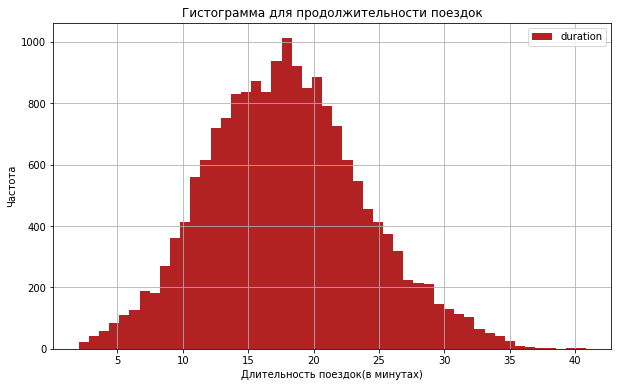

In [42]:
df_rides['duration'].hist(figsize=(10, 6), color='#B22222', legend=True, grid=True, bins=50)
plt.xlabel('Длительность поездок(в минутах)')
plt.ylabel('Частота')
plt.title('Гистограмма для продолжительности поездок')
plt.show()

<td style="background-color: skyblue;">От аномалий в данном атрибуте избавились: левого 'бугра' на гистограмме больше нет.</td>

На данном действий предобработку данных заканчиваем и подводим небольшой итог: набор данных оказался довольно коварным, так как только при добавлении нового столбца мы смогли отыскать значимое количество аномалий. Подведём итог в процентном соотношении потерь данных и перейдём к следующему этапу: 

In [43]:
print(f'Процент остаточных данных в датафрейме df_users = {len(df_users) / df_users_start * 100}')

print(f'Процент остаточных данных в датафрейме df_rides = {len(df_rides) / df_rides_start * 100}')

print(f'Процент остаточных данных в датафрейме df_subs = {len(df_subs) / df_subs_start * 100}')

Процент остаточных данных в датафрейме df_users = 98.01916932907349
Процент остаточных данных в датафрейме df_rides = 100.0
Процент остаточных данных в датафрейме df_subs = 100.0


<td style="background-color: skyblue;">Потери в данных оказались небольшими)</td>

#### Шаг 3. Исследовательский анализ данных

<td style="background-color: pink;">3.1 Частота встречаемости городов:</td>

In [44]:
# Создаем DataFrame из Series , чтобы более наглядно предоставить частоту

df_city_counts = pd.DataFrame(df_users['city'].value_counts().sort_values(ascending=False) / len(df_users['city']) * 100)

# Применяем стиль к DataFrame с цветовой картой 'magma'(cmap)
df_city_counts = df_city_counts.style.background_gradient(cmap='magma')

df_city_counts 

,city
Пятигорск,14.276402
Екатеринбург,13.298566
Ростов-на-Дону,12.907432
Краснодар,12.581486
Сочи,12.320730
Омск,11.929596
Тюмень,11.734029
Москва,10.951760


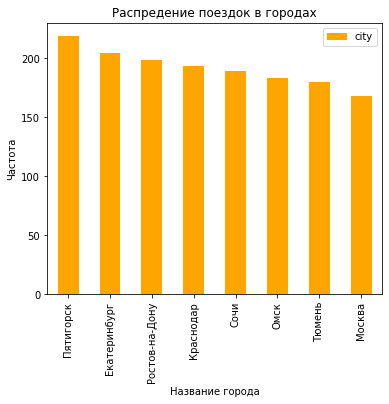

In [45]:
df_users['city'].value_counts().plot(kind='bar', color='orange', figsize=(6, 5), legend=True)
plt.xlabel('Название города')
plt.ylabel('Частота')
plt.title('Распредение поездок в городах')
plt.show()

<td style="background-color: skyblue;">Таблица рейтинга процентной клиентской базы приведена выше. Наша тройка лидеров: 1) Пятигорск, 2)Екатеринбург, 3)Ростов-на-Дону. Занятно что заинтересованность людей нашим сервисом в Москве очень плохая: возможно из-за наличия множества конкурентов.</td>

<td style="background-color: pink;">3.2 Соотношение пользователей с подпиской и без подписки:</td>

In [46]:
subs_type_counts = df_users['subscription_type'].value_counts()

In [47]:
subs_type_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

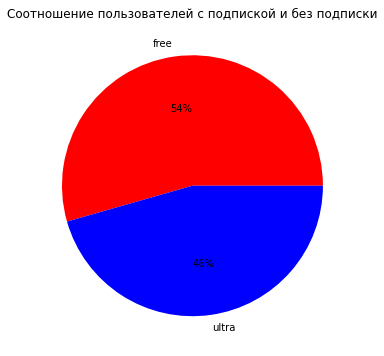

In [48]:
# Построение круговой диаграммы

plt.figure(figsize=(6, 6))

plt.pie(subs_type_counts, labels=subs_type_counts.index, autopct='%1.0f%%', colors = ['red', 'blue'])

plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

<td style="background-color: skyblue;">46% пользователей имеет платную подписку - 'ultra'. Это довольно внушительный результат т.к. пользователи которые приобрели её являются постоянными(или потенциально постоянными) клиентами нашего сервиса. 54% пользователей используют бесплатный тариф.</td>

<td style="background-color: pink;">3.3 Возраст пользователей:</td>

In [49]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

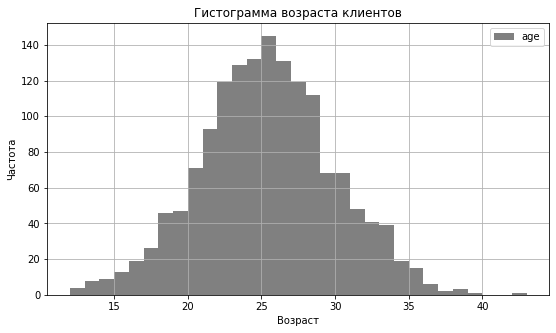

In [50]:
df_users['age'].hist(range=(12, 43), color='grey', figsize=(9,5), bins=31, legend=True, grid=True)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма возраста клиентов')
plt.show()

<td style="background-color: skyblue;">Медианное значение возраста равно 25-и годам, среднее - 24.9, межквартильный размах = значение 3-го квартиля - значение 1-го квартиля(25 и 75 перцентили соответсвенно) = 16, максимальное значение 43 года, стандартное отклонение равняется 4.57. Прекрасно что медианна и среднее не сильно оличаются т.к. это демонстрирует отсутствие выбросов. Распределение - Пуассоновское. Большая часть пользователей имеет диапозон возраста примерно от 18 до 32 лет.</td>

<td style="background-color: pink;">3.4 Расстояние, которое пользователь преодолел за одну поездку:</td>

<td style="background-color: skyblue;">Построим гистограмму для расстояния и найдём описательные статистики:</td>

In [51]:
df_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

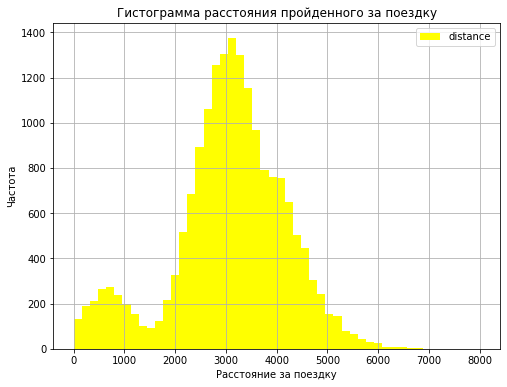

In [52]:
df_rides['distance'].plot(kind='hist', range=(0, 8000), bins=50, color='yellow', legend=True, grid=True, figsize=(8,6))
plt.xlabel('Расстояние за поездку')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния пройденного за поездку')
plt.show()

<td style="background-color: skyblue;">Основные описательные статистики отражены в методе выше. Из значимого: вероятно большинство опытных пользователей проезжают расстояние от ~ 2000 - ~ 4900 м, а основная часть новичкой от 200 м до 1200 м.</td>

<td style="background-color: pink;">3.5 Продолжительность поездок:</td>

<td style="background-color: skyblue;">Найдём описательные статистики и построим гистограмму для атрибута с продолжительностью поездок:</td>

In [53]:
df_rides['duration'].describe()

count    18068.000000
mean        17.895334
std          5.959714
min          2.035632
25%         13.697117
50%         17.679120
75%         21.724800
max         40.823963
Name: duration, dtype: float64

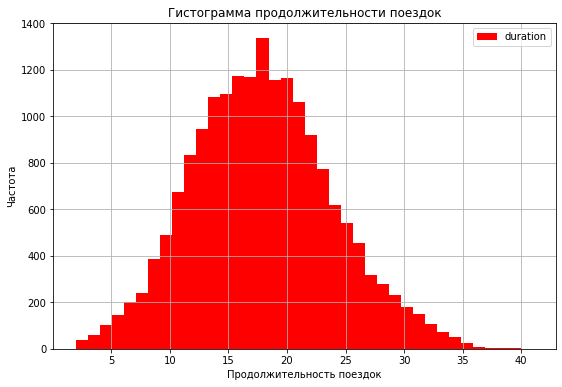

In [54]:
df_rides['duration'].plot(kind='hist', range=(2, 41), bins= 38, figsize=(9,6), color='red', legend=True, grid=True)
plt.xlabel('Продолжительность поездок')
plt.ylabel('Частота')
plt.title('Гистограмма продолжительности поездок')
plt.show()

<td style="background-color: skyblue;">Описательные статистики определены выше. Основная часть клиентов проводит за поездкой примерно от 8-и до 28-и минут(2 стандартных отклонения ~ 95% всех данных).</td>

#### Шаг 4. Объединение данных

<td style="background-color: skyblue;">Осуществим проверку размерности:</td>

- размеры датасетов до объединения(размер результирующего датафрейма расчитаем после преобразований):

In [55]:
print(f"Размерность датасетов: df_users - {len(df_users)}, df_rides - {len(df_rides)}, df_subs - {len(df_subs)}")

Размерность датасетов: df_users - 1534, df_rides - 18068, df_subs - 2


<td style="background-color: skyblue;">После объединения данных у нас должен получиться датафрейм размерностью 18068(идентично максимального размеру из всех 3-х датафреймов).</td>

<td style="background-color: pink;">4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().</td>

<td style="background-color: skyblue;">Сначала объёдиним таблицу пользователей и поездок(связь - один(пользователь) ко многим(много поездок одного пользователя)).</td>

In [56]:
df = df_users.merge(df_rides, on='user_id')

<td style="background-color: skyblue;">Добавим таблицу с тарифами.</td>

In [57]:
df = df.merge(df_subs, on='subscription_type')

<td style="background-color: skyblue;">Взглянем на случайную выборку 10-и записей в новом датафрейме:</td>

In [58]:
df.sample(n=10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,avg_speed_km_h,minute_price,start_ride_price,subscription_fee
9043,890,Кира,30,Омск,free,4418.324507,22.594086,2021-08-01,8,11.733135,8,50,0
17114,1468,Вероника,20,Ростов-на-Дону,free,3446.034732,23.338104,2021-03-01,3,8.859421,8,50,0
2902,310,Алла,29,Омск,ultra,3060.964863,20.203216,2021-02-01,2,9.090527,6,0,199
16988,1458,Тамерлан,24,Сочи,free,3718.026959,22.262282,2021-11-01,11,10.020609,8,50,0
16613,1430,Маргарита,22,Краснодар,free,4422.767029,22.056918,2021-03-01,3,12.030966,8,50,0
665,74,Арсений,19,Тюмень,ultra,3318.663680,14.712931,2021-03-01,3,13.533661,6,0,199
15925,1384,Анатолий,22,Москва,free,4053.902835,24.373869,2021-07-01,7,9.979301,8,50,0
11067,1032,Галина,27,Екатеринбург,free,2926.081805,24.630409,2021-11-01,11,7.127974,8,50,0
8314,834,Давид,29,Пятигорск,free,3392.806235,25.974610,2021-07-01,7,7.837206,8,50,0
10805,1014,Эмиль,33,Тюмень,free,500.437890,5.729661,2021-10-01,10,5.240497,8,50,0


<td style="background-color: skyblue;">Всё неплохо, но можно лучше: перенесём атрибут 'subscription_type' к атрибутам которые имеют с ним зависимость. Так данные будут иметь более хорошую структуру: проще восприниматься человеком. </td>

In [59]:
# структура до

df.tail(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,avg_speed_km_h,minute_price,start_ride_price,subscription_fee
18053,1533,Степан,22,Краснодар,free,4581.943632,21.163887,2021-08-01,8,12.989892,8,50,0
18054,1533,Степан,22,Краснодар,free,3414.448028,25.657792,2021-11-01,11,7.984587,8,50,0
18055,1534,Альберт,25,Краснодар,free,4678.415899,15.228198,2021-01-01,1,18.433235,8,50,0
18056,1534,Альберт,25,Краснодар,free,2103.914120,13.425579,2021-02-01,2,9.402562,8,50,0
18057,1534,Альберт,25,Краснодар,free,3434.290912,14.366248,2021-04-01,4,14.343164,8,50,0
18058,1534,Альберт,25,Краснодар,free,195.447469,6.469074,2021-06-01,6,1.812755,8,50,0
18059,1534,Альберт,25,Краснодар,free,3214.021065,18.343604,2021-06-01,6,10.512725,8,50,0
18060,1534,Альберт,25,Краснодар,free,3644.708038,20.289416,2021-08-01,8,10.778156,8,50,0
18061,1534,Альберт,25,Краснодар,free,3977.744996,26.916544,2021-08-01,8,8.866840,8,50,0
18062,1534,Альберт,25,Краснодар,free,4928.173852,22.560373,2021-09-01,9,13.106629,8,50,0


In [60]:
subscription_type = df.pop('subscription_type')

df.insert(9, 'subscription_type', subscription_type)

In [61]:
# структура после

df.tail(15)

,user_id,name,age,city,distance,duration,date,month,avg_speed_km_h,subscription_type,minute_price,start_ride_price,subscription_fee
18053,1533,Степан,22,Краснодар,4581.943632,21.163887,2021-08-01,8,12.989892,free,8,50,0
18054,1533,Степан,22,Краснодар,3414.448028,25.657792,2021-11-01,11,7.984587,free,8,50,0
18055,1534,Альберт,25,Краснодар,4678.415899,15.228198,2021-01-01,1,18.433235,free,8,50,0
18056,1534,Альберт,25,Краснодар,2103.914120,13.425579,2021-02-01,2,9.402562,free,8,50,0
18057,1534,Альберт,25,Краснодар,3434.290912,14.366248,2021-04-01,4,14.343164,free,8,50,0
18058,1534,Альберт,25,Краснодар,195.447469,6.469074,2021-06-01,6,1.812755,free,8,50,0
18059,1534,Альберт,25,Краснодар,3214.021065,18.343604,2021-06-01,6,10.512725,free,8,50,0
18060,1534,Альберт,25,Краснодар,3644.708038,20.289416,2021-08-01,8,10.778156,free,8,50,0
18061,1534,Альберт,25,Краснодар,3977.744996,26.916544,2021-08-01,8,8.866840,free,8,50,0
18062,1534,Альберт,25,Краснодар,4928.173852,22.560373,2021-09-01,9,13.106629,free,8,50,0


- размер результирующего датафрейма (с учетом типа объединения):

In [62]:
print(f"Размерность датасета: df - {len(df)}")

Размерность датасета: df - 18068


<td style="background-color: skyblue;">Размерность нового датафрейма совпала с максимальной размерностью одного из 3-х датафреймов, а значит соединение таблиц прошло корректно.</td>

<td style="background-color: pink;">4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:</td>

- c данными о пользователях без подписки:

In [63]:
df_st_free = df.query('subscription_type == "free"')

<td style="background-color: skyblue;">Выведем выборку из получившегося датафрейма(размерность=15):</td>

In [64]:
df_st_free.sample(n=15)

,user_id,name,age,city,distance,duration,date,month,avg_speed_km_h,subscription_type,minute_price,start_ride_price,subscription_fee
11387,1057,Адель,26,Москва,3283.312178,22.380892,2021-03-01,3,8.802095,free,8,50,0
16450,1420,Юлия,18,Краснодар,3208.911245,29.503152,2021-06-01,6,6.525902,free,8,50,0
14651,1290,Татьяна,23,Ростов-на-Дону,3259.142692,25.036571,2021-09-01,9,7.810517,free,8,50,0
13734,1226,Каролина,22,Москва,3800.106095,24.412139,2021-09-01,9,9.339877,free,8,50,0
6878,725,Ксения,29,Москва,4051.466318,25.257332,2021-12-01,12,9.624452,free,8,50,0
12728,1156,Эвелина,33,Тюмень,697.546388,14.550103,2021-02-01,2,2.876460,free,8,50,0
12158,1113,Николай,17,Екатеринбург,4496.306466,18.262654,2021-09-01,9,14.772135,free,8,50,0
16031,1392,Полина,32,Екатеринбург,235.127167,5.282512,2021-03-01,3,2.670629,free,8,50,0
10544,996,Александра,19,Ростов-на-Дону,3869.953842,13.930663,2021-02-01,2,16.668068,free,8,50,0
13888,1237,Евгения,23,Тюмень,2032.290057,14.172788,2021-07-01,7,8.603628,free,8,50,0


- с данными о пользователях с подпиской:

In [65]:
df_st_ultra = df.query('subscription_type == "ultra"')

<td style="background-color: skyblue;">Выведем выборку из получившегося датафрейма(размерность=15):</td>

In [66]:
df_st_ultra.sample(n=15)

,user_id,name,age,city,distance,duration,date,month,avg_speed_km_h,subscription_type,minute_price,start_ride_price,subscription_fee
4841,521,Лиана,17,Сочи,3047.983539,16.951261,2021-09-01,9,10.788519,ultra,6,0,199
3684,396,Тимур,33,Екатеринбург,2655.786681,18.381943,2021-08-01,8,8.668681,ultra,6,0,199
3651,393,Георгий,15,Тюмень,2971.600010,22.905333,2021-05-01,5,7.784039,ultra,6,0,199
3498,376,Анна,28,Ростов-на-Дону,3233.459921,15.778200,2021-04-01,4,12.295927,ultra,6,0,199
3060,328,Данил,35,Пятигорск,2971.016931,11.130441,2021-08-01,8,16.015630,ultra,6,0,199
1195,128,Лидия,24,Ростов-на-Дону,2816.818139,17.048052,2021-11-01,11,9.913689,ultra,6,0,199
757,83,Ксения,23,Омск,4417.598762,23.670395,2021-06-01,6,11.197782,ultra,6,0,199
382,41,Данила,21,Екатеринбург,3296.582324,12.911798,2021-06-01,6,15.318931,ultra,6,0,199
3543,381,Алия,25,Краснодар,2853.376000,17.340836,2021-02-01,2,9.872798,ultra,6,0,199
3573,384,Виктор,38,Омск,3452.461007,24.185156,2021-02-01,2,8.565074,ultra,6,0,199


<td style="background-color: pink;">4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.</td>

<td style="background-color: skyblue;">Расстояние:</td>

In [67]:
df_st_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

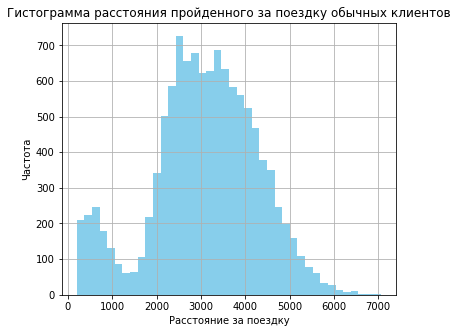

In [68]:
df_st_free['distance'].hist(range=(200, 7067), color='skyblue', grid=True, figsize=(6,5), bins=40)
plt.xlabel('Расстояние за поездку')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния пройденного за поездку обычных клиентов')
plt.show()

In [69]:
df_st_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

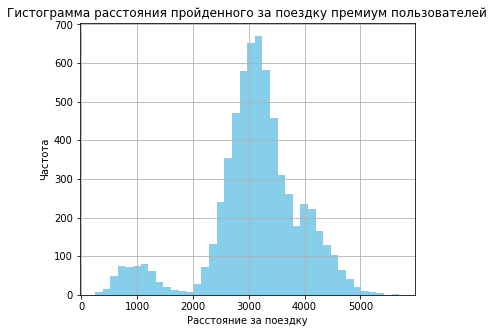

In [70]:
df_st_ultra['distance'].hist(range=(243, 5700), color='skyblue', grid=True, figsize=(6,5), bins=40)
plt.xlabel('Расстояние за поездку')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния пройденного за поездку премиум пользователей')
plt.show()

<td style="background-color: skyblue;">Расстояние которое проезжают пользователи с подпиской более предсказуемо(относительно расстояния которое проезжают пользователи без платной опции), хотя распределения довольно похожи. 'Маленькая' горка в гистограмме с подпиской 'ultra'(как и ожидалось) в процентном отношении меньше 'маленькой' аналогичной горки в гистограмме с 'free' подпиской(т.к. обычно пользователи при покупке платной подписке уже имеют навыки вождения самоката).</td>

<td style="background-color: skyblue;">Время поездок:</td>

In [71]:
df_st_free['duration'].describe()

count    11568.000000
mean        17.531984
std          6.137264
min          2.035632
25%         13.127082
50%         17.446822
75%         21.594071
max         34.948498
Name: duration, dtype: float64

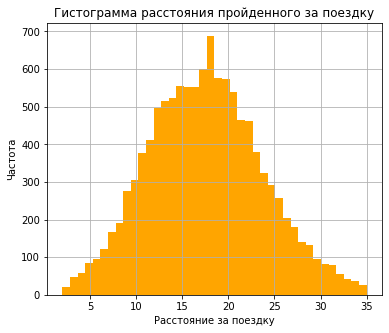

In [72]:
df_st_free['duration'].hist(range=(2, 35), color='orange', grid=True, figsize=(6,5), bins=40)
plt.xlabel('Расстояние за поездку')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния пройденного за поездку')
plt.show()

In [73]:
df_st_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<AxesSubplot:>

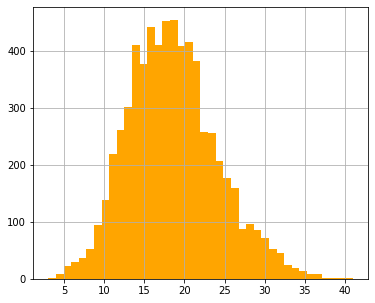

In [74]:
df_st_ultra['duration'].hist(range=(3, 41), color='orange', grid=True, figsize=(6,5), bins=40)

<td style="background-color: skyblue;">Снова заметим что вип-пользователи более предсказуемы во времени использования самоката(от 10 до 25 минут ~ 85-99% данных попадают в диапозон 2-х стандартных отклонений). У обычных пользователей стандартное отклонение времени использование выше, данные разнороднее. При условии что выбросы мы исключили средние значения получились похожими, но это ещё следует проверить.</td>

#### Шаг 5. Подсчёт выручки

<td style="background-color: pink;">5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.</td>

<td style="background-color: skyblue;">До использования агрегации(создания сводной таблицы) округлим время каждой поездки в большую сторону до минуты:</td>

<td style="background-color: skyblue;">Для начала взглянем на атрибут времени ДО изменения:</td>

In [75]:
df['duration'].tail(10)

18058     6.469074
18059    18.343604
18060    20.289416
18061    26.916544
18062    22.560373
18063    19.822962
18064    21.409799
18065    18.435051
18066    16.674362
18067    15.893917
Name: duration, dtype: float64

<td style="background-color: skyblue;">Округлим до минуты в большую сторону:</td>

In [76]:
df['duration'] = np.ceil(df['duration'])

<td style="background-color: skyblue;">Выведем также 10 последних записей чтобы сравнить и проверить корректность выполнения:</td>

In [77]:
df['duration'].tail(10)

18058     7.0
18059    19.0
18060    21.0
18061    27.0
18062    23.0
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, dtype: float64

<td style="background-color: skyblue;">Округление прошло успешно.</td>

In [78]:
# Создание нового датафрейма
df_with_profit = df.pivot_table(index=['month', 'user_id', 'subscription_type'], 
                                values=['distance', 'date', 'duration'], 
                                aggfunc={'distance': 'sum', 'date': 'count', 'duration': 'sum'})

# Переименование столбцов
df_with_profit = df_with_profit.rename(columns={'date': 'total_ride_in_month'})

# Для того чтобы избавиться от мультииндекса
df_with_profit.reset_index(inplace=True)

# Вывдим случайные 10 записей
df_with_profit.sample(10)

,month,user_id,subscription_type,total_ride_in_month,distance,duration
6452,7,1223,free,1,4311.498109,24.0
10560,12,351,ultra,1,4061.139532,32.0
2645,3,1251,free,1,4307.835592,14.0
8714,10,303,ultra,1,3588.585221,24.0
6715,8,75,ultra,2,6402.448614,37.0
224,1,413,ultra,2,8391.482951,44.0
10542,12,306,ultra,1,4237.836461,23.0
11005,12,1079,free,1,3978.383176,26.0
3344,4,926,free,2,6727.776639,41.0
7241,8,989,free,1,2269.204051,14.0


<td style="background-color: skyblue;">Проверим наличие пропусков в новой сводной таблице:</td>

In [79]:
df_with_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                11331 non-null  int64  
 1   user_id              11331 non-null  int64  
 2   subscription_type    11331 non-null  object 
 3   total_ride_in_month  11331 non-null  int64  
 4   distance             11331 non-null  float64
 5   duration             11331 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 531.3+ KB


<td style="background-color: skyblue;">Пропусков нет.</td>

<td style="background-color: pink;">5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 должны быть преобразованы к 
26
26.</td>

<td style="background-color: skyblue;">Замержденим таблицу с данными о подписках(потом удалим лишнее):</td>

In [80]:
df_with_profit = pd.merge(df_with_profit, df_subs, on='subscription_type')

<td style="background-color: skyblue;">Создадим функцию для подсчёта выручки для каждого пользователя за месяц:</td>

In [81]:
def month_profit(row):
    subscription_type = row['subscription_type']
    if subscription_type == 'free':
        minute_price_free = row['minute_price']
        start_ride_price_free = row['start_ride_price']
        subscription_fee_free = row['subscription_fee']
        quantity_rides = row['total_ride_in_month']
        return np.ceil((row['duration'] * minute_price_free + (start_ride_price_free * quantity_rides) + subscription_fee_free))
    
    elif subscription_type == 'ultra':
        minute_price_ultra = row['minute_price']
        start_ride_price_ultra = row['start_ride_price']
        subscription_fee_ultra = row['subscription_fee']
        quantity_rides = row['total_ride_in_month']
        return np.ceil((row['duration'] * minute_price_ultra + (start_ride_price_ultra * quantity_rides) + subscription_fee_ultra))

<td style="background-color: skyblue;">Создадим столбец с данными о выручке с каждого клиента:</td>

In [82]:
df_with_profit['month_price_per_client'] = df_with_profit.apply(month_profit, axis=1)

In [83]:
# для проверки гипотезы 6.3
profit_month_ultra = df_with_profit.loc[df_with_profit['subscription_type'] == 'ultra', 'month_price_per_client']

profit_month_free = df_with_profit.loc[df_with_profit['subscription_type'] == 'free', 'month_price_per_client']

<td style="background-color: skyblue;">Проверим корректность выполнения работы функции.</td>

In [84]:
df_with_profit.iloc[10665:10670]

,month,user_id,subscription_type,total_ride_in_month,distance,duration,minute_price,start_ride_price,subscription_fee,month_price_per_client
10665,11,1425,free,1,1639.398305,11.0,8,50,0,138.0
10666,11,1426,free,2,4225.155065,32.0,8,50,0,356.0
10667,11,1427,free,3,7241.309641,34.0,8,50,0,422.0
10668,11,1428,free,2,4573.837455,16.0,8,50,0,228.0
10669,11,1429,free,2,7424.453156,32.0,8,50,0,356.0


In [85]:
df_with_profit.iloc[1:10]

,month,user_id,subscription_type,total_ride_in_month,distance,duration,minute_price,start_ride_price,subscription_fee,month_price_per_client
1,1,3,ultra,1,3061.777147,13.0,6,0,199,277.0
2,1,5,ultra,1,3914.646990,13.0,6,0,199,277.0
3,1,7,ultra,2,6478.080979,28.0,6,0,199,367.0
4,1,12,ultra,1,3577.151148,33.0,6,0,199,397.0
5,1,13,ultra,2,6687.987446,42.0,6,0,199,451.0
6,1,14,ultra,2,7699.643820,35.0,6,0,199,409.0
7,1,15,ultra,1,4187.621459,39.0,6,0,199,433.0
8,1,20,ultra,1,3516.719208,29.0,6,0,199,373.0
9,1,22,ultra,1,3058.692225,13.0,6,0,199,277.0


<td style="background-color: skyblue;">Функция заполянет столбец корректно.</td>

<td style="background-color: skyblue;">Избавимся от избыточности:</td>

In [86]:
df_with_profit = df_with_profit.drop(['subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], axis=1)

<td style="background-color: skyblue;">Посмотрим на корректность выполнения, выведя 15 случайных записей:</td>

In [87]:
df_with_profit.sample(10)

,month,user_id,total_ride_in_month,distance,duration,month_price_per_client
9492,9,1312,2,8006.448060,41.0,428.0
8095,7,938,1,1976.414724,13.0,154.0
8759,8,1099,4,11038.034242,82.0,856.0
9622,9,1508,2,9064.516933,48.0,484.0
7969,7,750,4,13451.845961,64.0,712.0
9510,9,1334,2,6506.874125,40.0,420.0
6953,5,970,1,2643.108253,11.0,138.0
6695,4,1427,2,6181.231541,44.0,452.0
202,1,374,1,4052.329703,18.0,307.0
9487,9,1300,1,3913.688205,34.0,322.0


<td style="background-color: skyblue;">Получили необходимый датафрейм без избыточности.</td>

#### Шаг 6. Проверка гипотез

<td style="background-color: pink;">Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.</td>

<td style="background-color: pink;">6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.</td>

<td style="background-color: skyblue;">Проверим гипотезу о более высокой «выгодности» для компании пользователей с подпиской(относительно пользователей без подписки) следующим образом: H0: среднее значение времени поездки пользователей с подпиской равно среднему времени поездки пользователей без неё, H1: среднее значение времени поездки пользователей с подпиской больше среднего времени поездки пользователей без неё(одностороняя альтернативная гипотеза: alternative='greater' т.е. правая часть приемлема). Т.к. у нас сравниваются средние значение 2-х выборок, то воспользуемся методом ttest_ind:</td>

In [88]:

df_st_ultra_h = df_st_ultra['duration']
df_st_free_h = df_st_free['duration']
    
alpha = .05

results = st.ttest_ind(df_st_ultra_h, df_st_free_h, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.3080597507158844e-28
Отвергаем нулевую гипотезу


<td style="background-color: skyblue;">Получилось  маленькое  p-значения, что указывает на то, что существует очень низкая вероятность получить такие или более экстремальные результаты, если бы нулевая гипотеза была верна. Мы отвергли нулевую гипотезу о равенстве 2-х средних, значит всё же вип-пользователи тратят больше времени на поездки.</td>

<td style="background-color: pink;">6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.</td>

<td style="background-color: skyblue;">Проверим гипотезу о оптимальной дистанции за одну поездку у клиентов с подпиской следующим образом: H0: среднее значение равно 3130 м, H1: среднее значение больше 3130 м(одностороняя альтернативная гипотеза). Т.к. у нас сравнивается среднее выборки с определённым значением, то воспользуемся методом st.ttest_1samp:</td>

In [89]:
interested_value = 3130 # оптимальное расстояния за одну поездку

alpha = .05 # уровень статистической значимости
            

results = st.ttest_1samp(
    df_st_ultra['distance'], 
    interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


<td style="background-color: skyblue;">Довольно уверенное p-значение у нас получилось, дополнительных тестов проводить не необходимо. Нулевую гипотезу мы не отвергаем: вероятность получить оптимальное расстояние(3130м) у случайного вип-клиента довольно значима.</td>

<td style="background-color: pink;">6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.</td>

<td style="background-color: skyblue;">Проверим гипотезу о более высоких тратах вип-клиентов с подпиской следующим образом: H0: среднее значение трат за месяц вип клиентов равно среднему значению трат обычных клиентов без подписки, H1: среднее значение трат за месяц вип клиентов больше среднего значени трат обычных клиентов без подписки. Т.к. у нас сравниваются средние значения 2-х выборок, то воспользуемся методом st.ttest_ind:</td>

In [90]:
profit_month_free_h = profit_month_free
profit_month_ultra_h = profit_month_ultra
    
alpha = .05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(profit_month_ultra_h, profit_month_free_h, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.24111879849303e-28
Отвергаем нулевую гипотезу


<td style="background-color: skyblue;">Получили очень близкое к нулю p-значение из-за чего отвергли нулевую гипотезу в пользу альтернативной одностороней: среднее значение трат вип клиентов за месяц выше среднего значения трат обычных клиентов. Вип-клиенты при условии истинности нулевой гипотезы приносят больше финансов компании.</td>

<td style="background-color: pink;">6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?</td>

<td style="background-color: skyblue;">Так как у нас получаются парные выборки: до и после обновления серверов, то целесобразно использовать алгоритм проверки гипотезы о равенстве средних для зависимых (парных) выборок. В библиотеке scipy: scipy.stats.ttest_rel().</td>

#### Шаг 8. Общий вывод. 

- популярность нашего сервиса среди городов(в процентах)

In [91]:
df_city_counts 

,city
Пятигорск,14.276402
Екатеринбург,13.298566
Ростов-на-Дону,12.907432
Краснодар,12.581486
Сочи,12.320730
Омск,11.929596
Тюмень,11.734029
Москва,10.951760


- процент клиентов без подписки и с подпиской: 54% и 46%.

- Большая часть пользователей имеет диапозон возраста примерно от 18 до 32 лет.

- вероятно большинство опытных пользователей проезжают расстояние от ~ 2000 - ~ 4900 м, а основная часть новичкой от 200 м до 1200 м.

- Основная часть клиентов проводит за поездкой примерно от 8-и до 28-и минут(2 стандартных отклонения ~ 95% всех данных).

- Расстояние которое проезжают пользователи с подпиской более предсказуемо(относительно расстояния которое проезжают пользователи без платной опции), хотя распределения довольно похожи

<td style="background-color: skyblue;">Мы написали функцию для подсчёта выручки и получили следующие итого статистического анализа данных:</td>

- вип-пользователи тратят больше времени на поездки.

- вероятность получить оптимальное расстояние(3130м) у случайного вип-клиента довольно значима, что может также улучшить финансовое положение компании из-за уменьшения трат на издержки в виде ремонта самокатов.

- Вип-клиенты при условии истинности нулевой гипотезы(6.3) приносят больше финансов компании.

<td style="background-color: lightgreen;">Рекомендации:</td>

- Клиенты с подпиской более предсказуемы и в теории сохраняют и приносят больше финансов компании, поэтому предлагаем попытаться увеличить долю клиентов с подпиской за счёт рекламы, временных акций и т.д. Так как поведение клиентов с подпиской более выгодно для компании с финансовой точки зрения.

- Так как основная часть пользователей возрастом от 22 до 28 лет, то необходимо постараться акцентировать внимание на данном сегменте пользователей(при создании рекламы понимать что она нацелена в большую степень на данный возраст и т.д.).

- Поскольку Пятигорск, Екатеринбург и Ростов-на-Дону входят в топ-3 городов по доле пользователей нашего сервиса, то стоит максимально проявлять активность и развитие проекта именно в этих городах, так как в других населённых пунктах либо наш сервис не так интересен, либо присутствуют сильные конкуренты, которых пользователи предпочитают больше.